<a href="https://colab.research.google.com/github/awais-riaz313/EcoMacroTrends/blob/main/Macro_Eco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real World Project with Using Python
# ✅ 1. Trend of Inflation, Interest Rate, and GDP Growth (2015–2024)

✅ Step 1: Data Preparation
🔹 Q1: How to load the data and explore basic structure?

In [3]:
import pandas as pd

# Replace filename.csv with your actual file name
df = pd.read_csv("eco_data_final.csv", encoding='ISO-8859-1')


In [4]:
# Preview data
print(df.head())

  Country_Name  C_Id  Years   CPI_(%) Interest_rate (%)  LNGDP_(%)
0        India     1   2015  4.906973       10.00833333  28.372958
1        India     1   2016  4.948216            9.6725  28.455197
2        India     1   2017  3.328173       9.508333333  28.518912
3        India     1   2018  3.938826       9.454166667  28.582679
4        India     1   2019  3.729506           9.46625  28.620562


In [5]:
print(df.tail())

   Country_Name  C_Id  Years    CPI_(%) Interest_rate (%)  LNGDP_(%)
25          PAK     3   2020   9.739993       10.75774943  26.606588
26          PAK     3   2021   9.496211       8.665974215  26.668686
27          PAK     3   2022  19.873860                 .  26.714730
28          PAK     3   2023  30.768128                 .  26.714730
29          PAK     3   2024  12.632532                 .  26.746713


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_Name       30 non-null     object 
 1   C_Id               30 non-null     int64  
 2   Years              30 non-null     int64  
 3   CPI_(%)            30 non-null     float64
 4   Interest_rate (%)  30 non-null     object 
 5   LNGDP_(%)          30 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ KB
None


Interest_rate (%) is showing as object instead of float64
This happens because some values are . (dot), which is a string, making the whole column fall back to object type.

In [7]:
# Convert Interest_rate column to numeric, forcing non-numeric entries like '.' to NaN
df['Interest_rate (%)'] = pd.to_numeric(df['Interest_rate (%)'], errors='coerce')

# Confirm the change
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_Name       30 non-null     object 
 1   C_Id               30 non-null     int64  
 2   Years              30 non-null     int64  
 3   CPI_(%)            30 non-null     float64
 4   Interest_rate (%)  22 non-null     float64
 5   LNGDP_(%)          30 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ KB
None


# Summary statistics
🔍 Why Use include='all'?
By default, df.describe() only includes numeric columns. But your dataset has both:

Numeric: CPI_(%), Interest_rate (%), LNGDP_(%)

Categorical: Country_Name

If you want summary info for all columns, not just numeric ones, you must use include='all'

In [8]:
print(df.describe(include='all'))

       Country_Name       C_Id        Years    CPI_(%)  Interest_rate (%)  \
count            30  30.000000    30.000000  30.000000          22.000000   
unique            3        NaN          NaN        NaN                NaN   
top           India        NaN          NaN        NaN                NaN   
freq             10        NaN          NaN        NaN                NaN   
mean            NaN   2.000000  2019.500000   6.240665           7.712849   
std             NaN   0.830455     2.921384   6.108532           2.781176   
min             NaN   1.000000  2015.000000   0.118627           3.250000   
25%             NaN   1.000000  2017.000000   3.044187           4.998750   
50%             NaN   2.000000  2019.500000   4.802416           8.682154   
75%             NaN   3.000000  2022.000000   6.680135           9.497812   
max             NaN   3.000000  2024.000000  30.768128          12.233055   

        LNGDP_(%)  
count   30.000000  
unique        NaN  
top           N

🔹 Q2: How to identify and handle missing values (e.g., interest rates)?

In [9]:
# Count missing values
print(df.isna().sum())

Country_Name         0
C_Id                 0
Years                0
CPI_(%)              0
Interest_rate (%)    8
LNGDP_(%)            0
dtype: int64


In [11]:
## Replace missing 'Interest_rate (%)' with country-wise mean
df['Interest_rate (%)']=df.groupby('Country_Name')['Interest_rate (%)'].transform(lambda x:x.fillna(x.mean()))

In [12]:
print(df.isna().sum())

Country_Name         0
C_Id                 0
Years                0
CPI_(%)              0
Interest_rate (%)    0
LNGDP_(%)            0
dtype: int64


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df[['Country_Name', 'Years', 'Interest_rate (%)']]


,Country_Name,Years,Interest_rate (%)
0,India,2015,10.008333
1,India,2016,9.672500
2,India,2017,9.508333
3,India,2018,9.454167
4,India,2019,9.466250
5,India,2020,9.150000
6,India,2021,8.698333
7,India,2022,8.567143
8,India,2023,9.315632
9,India,2024,9.315632


To see the actual duplicate rows:

✅ To calculate summary statistics only for three variables:
CPI_(%)
Interest_rate (%)
LNGDP_(%)
➤ Use this clean version:

In [15]:
df[['CPI_(%)', 'Interest_rate (%)', 'LNGDP_(%)']].describe()


,CPI_(%),Interest_rate (%),LNGDP_(%)
count,30.000000,30.000000,30.000000
mean,6.240665,7.636526,28.622529
std,6.108532,2.754896,1.675609
min,0.118627,3.250000,26.427048
25%,3.044187,4.298542,26.714730
50%,4.802416,8.726667,28.601621
75%,6.680135,9.588702,30.574078
max,30.768128,12.233055,30.753386


In [16]:
df[df.duplicated()]

,Country_Name,C_Id,Years,CPI_(%),Interest_rate (%),LNGDP_(%)


Optional: Check duplicates based on specific columns (e.g., Country_Name, Years):

In [17]:
df.duplicated(subset=['Country_Name', 'Years'])


,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


💡 Purpose:
To calculate the average CPI (%) for each country in each year — and store it in a new DataFrame called cpi_avg.

🔍 Step-by-step Explanation:
Part	Meaning
df.groupby(['Country_Name', 'Years'])	Groups the dataset by country and year (e.g., India–2015, India–2016, etc.)
['CPI_(%)']	Selects only the CPI column to aggregate
.mean()	Calculates the mean CPI for each group (even if duplicates existed)
.reset_index()	Converts the result from groupby object to a clean DataFrame with proper columns

📄 Output Example of cpi_avg:
Country_Name	Years	CPI_(%)
India	2015	4.90
India	2016	4.94
...	...	...

This is helpful for visualizing CPI trends over time.

Let me know if you'd like to do the same for Interest Rate or LNGDP!








Ask ChatGPT
You said:
how to check duplicates values


ChatGPT said:
To check for duplicate rows in your DataFrame, use:

✅ One-Line Command:
python
Copy code
df.duplicated().sum()
This will return the number of duplicated rows.
🔍 To see the actual duplicate rows:
python
Copy code
df[df.duplicated()]
💡 Optional: Check duplicates based on specific columns (e.g., Country_Name, Years):
python
Copy code
df.duplicated(subset=['Country_Name', 'Years'])
Let me know if you want to remove duplicates too.











In [19]:
cpi_avg=df.groupby(['Country_Name','Years'])['CPI_(%)'].mean().reset_index()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Line Plot

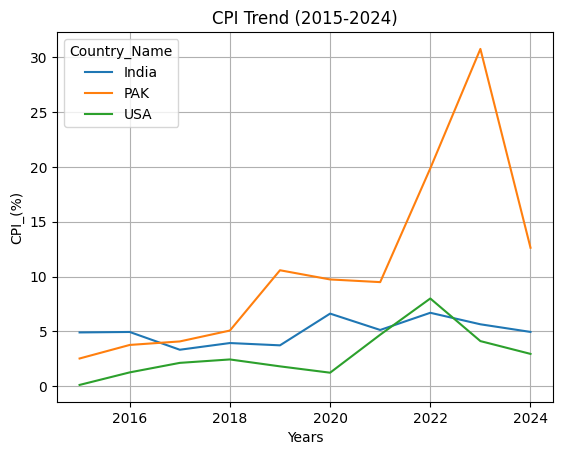

In [22]:
sns.lineplot(data=cpi_avg, x='Years',y='CPI_(%)',hue='Country_Name',markers="o")
plt.title('CPI Trend (2015-2024)')
plt.grid(True)
plt.show()

How add Title?

🔹 Q4: How did interest rates change over time per country?

In [24]:
interest_avg=df.groupby(['Country_Name','Years'])['Interest_rate (%)'].mean().reset_index()

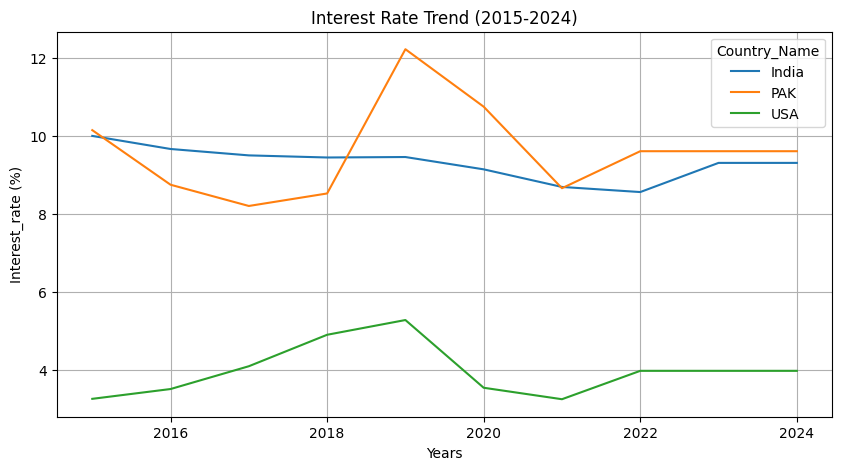

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=interest_avg, x='Years',y='Interest_rate (%)',hue='Country_Name',markers='o')
plt.title('Interest Rate Trend (2015-2024)')
plt.grid(True)
plt.show()


🔹 Q4: How did GDP change over time per country?

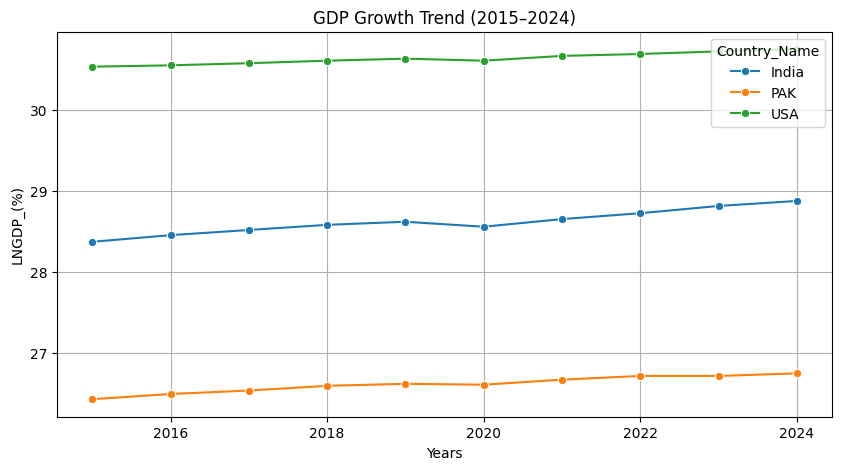

In [28]:
# Group GDP data
lgdp_avg = df.groupby(['Country_Name', 'Years'])['LNGDP_(%)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=lgdp_avg, x='Years', y='LNGDP_(%)', hue='Country_Name', marker='o')
plt.title('GDP Growth Trend (2015–2024)')
plt.grid(True)
plt.show()

In [29]:
df['LNGDP_(%)'].mean()


np.float64(28.622528901333332)

In [30]:
df.groupby('Country_Name')['LNGDP_(%)'].mean()


,LNGDP_(%)
Country_Name,
India,28.618318
PAK,26.611472
USA,30.637796


✅ Step 3: Correlation and Economic Insights
🔹 Q5: Is there a correlation between CPI and Interest Rate?

In [31]:
# Correlation per country
for country in df['Country_Name'].unique():
    subset = df[df['Country_Name'] == country][['CPI_(%)', 'Interest_rate (%)']]
    print(f"{country} correlation:\n", subset.corr(), "\n")


India correlation:
                     CPI_(%)  Interest_rate (%)
CPI_(%)            1.000000          -0.541947
Interest_rate (%) -0.541947           1.000000 

USA correlation:
                     CPI_(%)  Interest_rate (%)
CPI_(%)            1.000000           0.017956
Interest_rate (%)  0.017956           1.000000 

PAK correlation:
                     CPI_(%)  Interest_rate (%)
CPI_(%)            1.000000           0.175342
Interest_rate (%)  0.175342           1.000000 



🔹 Q6: How does GDP (log) correlate with CPI and Interest Rate?
python
Copy code


In [32]:
for country in df['Country_Name'].unique():
    subset = df[df['Country_Name'] == country][['LNGDP_(%)', 'CPI_(%)', 'Interest_rate (%)']]
    print(f"{country} correlation:\n", subset.corr(), "\n")


India correlation:
                    LNGDP_(%)   CPI_(%)  Interest_rate (%)
LNGDP_(%)           1.000000  0.276382          -0.570149
CPI_(%)             0.276382  1.000000          -0.541947
Interest_rate (%)  -0.570149 -0.541947           1.000000 

USA correlation:
                    LNGDP_(%)   CPI_(%)  Interest_rate (%)
LNGDP_(%)           1.000000  0.664284           0.150929
CPI_(%)             0.664284  1.000000           0.017956
Interest_rate (%)   0.150929  0.017956           1.000000 

PAK correlation:
                    LNGDP_(%)   CPI_(%)  Interest_rate (%)
LNGDP_(%)           1.000000  0.755614           0.077964
CPI_(%)             0.755614  1.000000           0.175342
Interest_rate (%)   0.077964  0.175342           1.000000 



In [33]:
df[['CPI_(%)', 'Interest_rate (%)', 'LNGDP_(%)']].corr()


,CPI_(%),Interest_rate (%),LNGDP_(%)
CPI_(%),1.000000,0.426087,-0.515266
Interest_rate (%),0.426087,1.000000,-0.849937
LNGDP_(%),-0.515266,-0.849937,1.000000


✅ Required: These libraries are needed to create and display the heatmap.
seaborn is used for plotting, and matplotlib.pyplot is required to render the figure.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

✅ Required: Selects only the three numeric columns you want to correlate.

If you skip this and use the full DataFrame, you might get an error or irrelevant correlations (like with Country_Name).

python
Copy code
corr_matrix = corr_data.corr()
✅ Required: This calculates the Pearson correlation matrix, which is what the heatmap will visualize.

Without this, you have no data to plot.

python
Copy code
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: CPI, Interest Rate, and Log GDP")
plt.show()
✅ Required: This section:

Sets the figure size

Draws the heatmap with annotations (annot=True)

Uses a color map (cmap='coolwarm')

Formats numbers (fmt=".2f")

Adds a title

Shows the plot

✅ In Summary — Compulsory Steps:
Step	Description	Required
Import libraries	seaborn, matplotlib.pyplot	✅ Yes
Select numeric columns	Filter DataFrame	✅ Yes
Compute correlation	corr()	✅ Yes
Plot with sns.heatmap()	Visualizes matrix	✅ Yes

Let me know if you want a version that shows correlation by country (using groupby) or want to save the plot to a file!


In [36]:
# Select relevant columns
corr_data = df[['CPI_(%)', 'Interest_rate (%)', 'LNGDP_(%)']]

✅ Required: This calculates the Pearson correlation matrix, which is what the heatmap will visualize.

Without this, you have no data to plot.

In [37]:
# Calculate correlation matrix
corr_matrix = corr_data.corr()

✅ Required: This section:

Sets the figure size
Draws the heatmap with annotations (annot=True)

Uses a color map (cmap='coolwarm')

Formats numbers (fmt=".2f")

Adds a title

Shows the plot



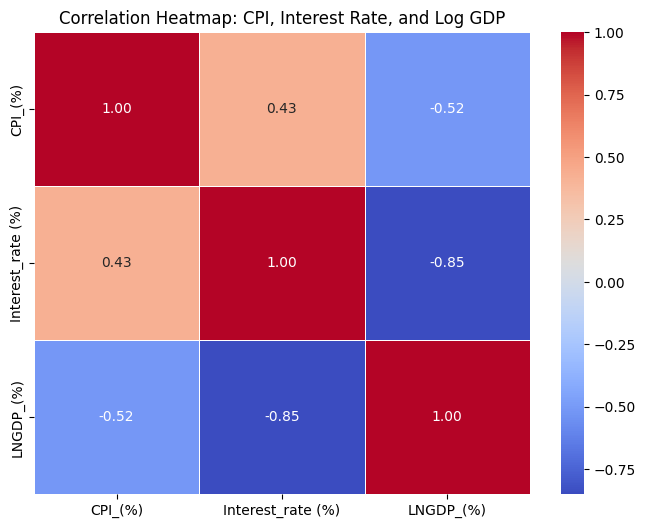

In [38]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: CPI, Interest Rate, and Log GDP")
plt.show()

📊 Interpretation of Values:
Variable Pair	Correlation	Meaning
CPI & Interest Rate	+0.43	Moderate positive correlation:
#As inflation rises, interest rates tend to rise.
#Interest Rate & LNGDP	-0.85	Strong negative correlation:
#As interest rates increase, GDP growth tends to decrease.
#CPI & LNGDP	-0.52	Moderate negative correlation: Higher inflation is somewhat associated with lower GDP growth.

#✅ Step 4: Advanced Analysis – Regression
🔹 Q7: Can CPI be predicted using interest rate and log GDP?

To run multiple regression analysis with GDP (LNGDP) as the dependent variable and CPI and Interest Rate as independent variables on panel data, follow these steps:

In [69]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Define features (independent variables) and target (dependent variable)
X = df_model[['Interest_rate (%)', 'CPI_(%)', 'Country_Name_USA']]
y = df_model['LNGDP_(%)']

# Convert all to numeric explicitly (force everything to float)
X = X.apply(pd.to_numeric, errors='coerce').astype(float)
y = pd.to_numeric(y, errors='coerce').astype(float)

# Combine and drop missing rows
df_clean = pd.concat([X, y], axis=1).dropna()
X = df_clean[X.columns]
y = df_clean[y.name]

# Add constant (intercept term)
X = sm.add_constant(X)

# Confirm data types
print(X.dtypes)
print(y.dtypes)

# Now fit the model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())


const                float64
Interest_rate (%)    float64
CPI_(%)              float64
Country_Name_USA     float64
dtype: object
float64
                            OLS Regression Results                            
Dep. Variable:              LNGDP_(%)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     31.81
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           7.45e-09
Time:                        17:35:21   Log-Likelihood:                -34.426
No. Observations:                  30   AIC:                             76.85
Df Residuals:                      26   BIC:                             82.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.02

The model explains 78.6% of the variation in LNGDP (%) (R-squared = 0.786), indicating a strong overall fit. Among the predictors:

Interest Rate (%) has a negative but statistically insignificant effect on LNGDP (p = 0.599).

CPI (%) also shows a negative effect, which is marginally insignificant (p = 0.062), suggesting inflation may reduce LNGDP but evidence is weak.

Country_Name_USA is positive and significant (p = 0.050), implying that being the USA (vs. another country) is associated with a 2.2% higher LNGDP, holding other factors constant.

The model intercept is 28.99, and the low Durbin-Watson value (0.396) indicates possible positive autocorrelation in residuals, which may need addressing in time series settings.

In [70]:
df.to_csv("cleaned_macro_data.csv", index=False)
